Imports

In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

## Tratamento de dados

In [208]:
df = pd.read_csv('insurance.csv')

In [209]:
df

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.560,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1336,50,male,30.970,3,no,northwest,10600.54830
1337,18,female,31.920,0,no,northeast,2205.98080
1338,18,female,36.850,0,no,southeast,1629.83350
1339,21,female,25.800,0,no,southwest,2007.94500


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idade              1341 non-null   int64  
 1   sexo               1338 non-null   object 
 2   imc                1341 non-null   float64
 3   quantidade_filhos  1341 non-null   int64  
 4   fumante            1341 non-null   object 
 5   regiao             1341 non-null   object 
 6   custos_seguro      1341 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.5+ KB


In [211]:
# Dropando valores nulos da coluna "sexo"
df = df.dropna(inplace=False)

In [212]:
# Fazendo OneLabelEncoder com algumas variáveis categóricas
encoder = LabelEncoder()
df['sexo'] = encoder.fit_transform(df['sexo'])
df['fumante'] = encoder.fit_transform(df['fumante'])
df['regiao'] = encoder.fit_transform(df['regiao'])

C:\Users\rafae\AppData\Local\Temp\ipykernel_11608\144606654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sexo'] = encoder.fit_transform(df['sexo'])
C:\Users\rafae\AppData\Local\Temp\ipykernel_11608\144606654.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fumante'] = encoder.fit_transform(df['fumante'])
C:\Users\rafae\AppData\Local\Temp\ipykernel_11608\144606654.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [213]:
df

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.560,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1336,50,1,30.970,3,0,1,10600.54830
1337,18,0,31.920,0,0,0,2205.98080
1338,18,0,36.850,0,0,2,1629.83350
1339,21,0,25.800,0,0,3,2007.94500


In [214]:
df.describe()

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663815,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098367,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


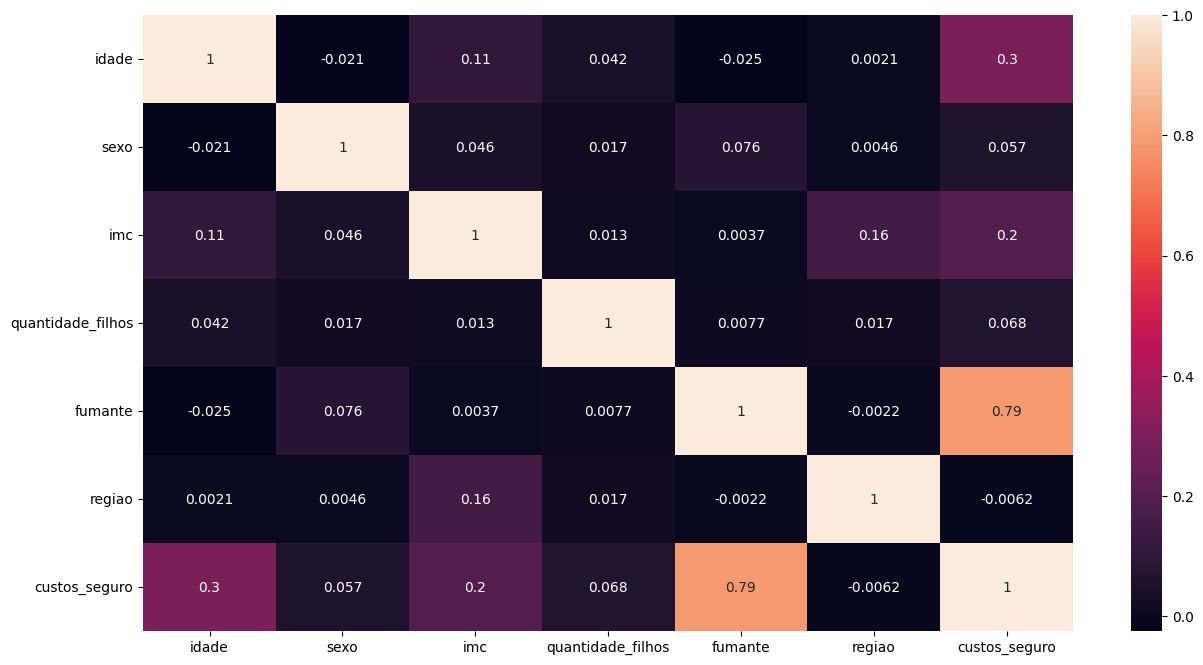

In [215]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

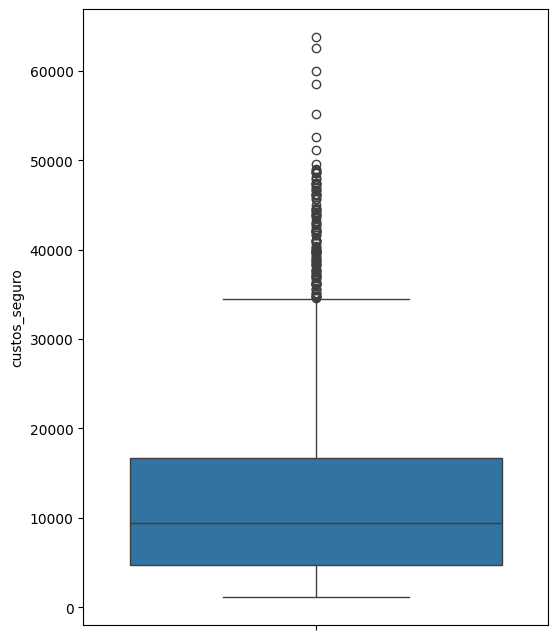

In [216]:
plt.figure(figsize=(6, 8))
sns.boxplot(y=df['custos_seguro'])
plt.show()

Como há alguns outliers com preços, irei retirar parte da base e testa-la em comparação com a base completa

In [217]:
df_outlier = df.loc[df['custos_seguro'] < 3500]

In [218]:
df_outlier.describe()

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
count,231.000000,231.000000,231.000000,231.000000,231.0,231.000000,231.000000
mean,21.528139,0.541126,29.767857,0.316017,0.0,1.588745,2261.388053
std,3.279427,0.499388,6.447753,0.604083,0.0,1.083334,641.459717
min,18.000000,0.000000,15.960000,0.000000,0.0,0.000000,1121.873900
25%,19.000000,0.000000,25.127500,0.000000,0.0,1.000000,1722.953000
50%,21.000000,1.000000,29.735000,0.000000,0.0,2.000000,2200.830850
75%,24.000000,1.000000,34.045000,0.500000,0.0,2.500000,2736.930100
max,31.000000,1.000000,53.130000,3.000000,0.0,3.000000,3490.549100


# Normalizando dados

In [219]:
df

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.560,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1336,50,1,30.970,3,0,1,10600.54830
1337,18,0,31.920,0,0,0,2205.98080
1338,18,0,36.850,0,0,2,1629.83350
1339,21,0,25.800,0,0,3,2007.94500


In [220]:
#  Utilizando MinMaxScaler para transformar em uma escala logaritma
scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), index=(df.index) ,columns=(df.columns))

# Modelo OLS

In [221]:
df.columns

Index(['idade', 'sexo', 'imc', 'quantidade_filhos', 'fumante', 'regiao',
       'custos_seguro'],
      dtype='object')

In [235]:
function = 'custos_seguro~idade+imc+quantidade_filhos+fumante+regiao'

model = smf.ols(formula=function, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          custos_seguro   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     802.2
Date:                Sat, 24 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:36:25   Log-Likelihood:                 1230.3
No. Observations:                1338   AIC:                            -2449.
Df Residuals:                    1332   BIC:                            -2417.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0488      0.00

## Separando Bases modelo

In [236]:
# Definindo target e variáveis explicativas 
x = df.drop(columns=('custos_seguro'))
y = df[['custos_seguro']]


In [237]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

## Construindo os modelos

### Trerinando com LinearRegression

In [241]:
lr = LinearRegression()

lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

In [242]:
# Printando Resultado
r_sq = lr.score(x, y)
print('R²: ', r_sq)
print('MAE: ', mean_absolute_error(y_test, lr_pred))
print('MSE: ', mean_squared_error(y_test, lr_pred))

R²:  0.7505723522903502
MAE:  0.06273354761274862
MSE:  0.008113934651324635


### Treino com GradientBoostingRegressor

In [225]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)

In [226]:
r_sq = gbr.score(x_test, y_test)
print('R²: ', r_sq)
print('MAE: ', mean_absolute_error(y_test, gbr_pred))
print('MSE: ', mean_squared_error(y_test, gbr_pred))

R²:  0.861660548056778
MAE:  0.040448812383888075
MSE:  0.00531848189613036


### Treino com AdaBoostRegressor

In [228]:
ada = AdaBoostRegressor(n_estimators=100)
ada.fit(x_train, y_train)
ada_pred = ada.predict(x_test)

r_sq = ada.score(x_test, y_test)
print('R²: ', r_sq)
print('MAE: ', mean_absolute_error(y_test, ada_pred))
print('MSE: ', mean_squared_error(y_test, ada_pred))

R²:  0.8128689403452765
MAE:  0.06748533756588704
MSE:  0.00719428289614603


### Treinando com RandomForestRegressor

In [243]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)

d:\Nova pasta\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [244]:
r_sq = rf.score(x_test, y_test)
print('R²: ', r_sq)
print('MAE: ', mean_absolute_error(y_test, rf_predict))
print('MSE: ', mean_squared_error(y_test, rf_predict))

R²:  0.8788902456001069
MAE:  0.04180495282273422
MSE:  0.004910310767725958


## Otimização  de Hiperparametros
- Utilizando GridSearch e o modelo GradientBoostRegressor

In [254]:
parameters = {'max_depth': [5, 10, 20],
              'min_samples_leaf': [2, 3, 4],
              'min_samples_split': [2, 3],
              'n_estimators': [50, 100, 200]
              }

grid_search = GridSearchCV(gbr, parameters, scoring='r2', cv=2, n_jobs=-1) # n_job -1, significa para rodar tudo

In [255]:
grid_search.fit(x_train, y_train)

d:\Nova pasta\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [256]:
print(grid_search.best_estimator_)
print(grid_search.best_params_)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=4, n_estimators=50)
{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [257]:
# Testando Novamente os parametros
parameters = {'max_depth': [5],
              'min_samples_leaf': [2],
              'min_samples_split': [2],
              'n_estimators': [100]
              }

grid_search = GridSearchCV(gbr, parameters, scoring='r2', cv=2, n_jobs=-1) # n_job -1, significa para rodar tudo

In [258]:
grid_search.fit(x_train, y_train)

d:\Nova pasta\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [100]},
             scoring='r2')

In [259]:
best_model = grid_search.best_estimator_
best_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [262]:
gbr_tunned = GradientBoostingRegressor(
alpha = 0.9,
ccp_alpha = 0.0,
criterion = 'friedman_mse',
init = None,
learning_rate = 0.1,
loss = 'squared_error',
max_depth = 5,
max_features = None,
max_leaf_nodes = None,
min_impurity_decrease = 0.0,
min_samples_leaf = 2,
min_samples_split = 2,
min_weight_fraction_leaf = 0.0,
n_estimators = 100,
n_iter_no_change = None,
random_state = None,
subsample = 1.0,
tol = 0.0001,
validation_fraction = 0.1,
verbose = 0,
warm_start = False
)

In [264]:
gbr_tunned.fit(x_train, y_train)
gbr_tunned_pred = gbr_tunned.predict(x_test)

d:\Nova pasta\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [268]:
r_sq = gbr_tunned.score(x, y)
print('R²: ', r_sq)
print('MAE: ', mean_absolute_error(y_test, gbr_tunned_pred))
print('MSE: ', mean_squared_error(y_test, gbr_tunned_pred))

R²:  0.9254273437377394
MAE:  0.044469743133416784
MSE:  0.005338050104570839
